## SHAP

As ML Models become more complex they tend to loose their explainability. **SHAP** (SHapley Additive exPlanations) is a game theoretic approach to explain the output of any machine learning model. 

https://www.nature.com/articles/s42256-019-0138-9.epdf?shared_access_token=RCYPTVkiECUmc0CccSMgXtRgN0jAjWel9jnR3ZoTv0O81kV8DqPb2VXSseRmof0Pl8YSOZy4FHz5vMc3xsxcX6uT10EzEoWo7B-nZQAHJJvBYhQJTT1LnJmpsa48nlgUWrMkThFrEIvZstjQ7Xdc5g%3D%3D

SHAP can explain the output of any ML algorithm, but is exponential time for most algorithms. For tree based models there is a fast version of SHAP which is implemented in package shap. We will experiment with that model in this notebook.

In [1]:
import xgboost
import shap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

# load JS visualization code to notebook
shap.initjs()

### Load Boston housing dataset


In [2]:
X, y = shap.datasets.boston()
print(X[:10])
print(y[:10])
print(X.shape)

      CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575   65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421   78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185   61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998   45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147   54.2  6.0622  3.0  222.0   
5  0.02985   0.0   2.18   0.0  0.458  6.430   58.7  6.0622  3.0  222.0   
6  0.08829  12.5   7.87   0.0  0.524  6.012   66.6  5.5605  5.0  311.0   
7  0.14455  12.5   7.87   0.0  0.524  6.172   96.1  5.9505  5.0  311.0   
8  0.21124  12.5   7.87   0.0  0.524  5.631  100.0  6.0821  5.0  311.0   
9  0.17004  12.5   7.87   0.0  0.524  6.004   85.9  6.5921  5.0  311.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33  
5     18.7  394.1

In [3]:
import numpy as np
print(f"Mean of y={np.mean(y):.10}")

Mean of y=22.53280632


In [4]:
#Lets use default XgBoost parameters
import xgboost as xgb
model = xgb.XGBRegressor(n_estimators=10)
model.fit(X, y)
print(f"Train score={model.score(X, y):.3}")

Train score=0.966


In [5]:
y_pred = model.predict(X)

In [6]:
#Now lets create a Shapley explainer
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)

In [7]:
i = 1
shap.force_plot(explainer.expected_value, shap_values[i,:], X.iloc[i,:])

In [8]:
import pandas as pd
df = pd.DataFrame({'Values':X.iloc[1,:],'ShapScore':shap_values[1,:]})
df 

,Values,ShapScore
CRIM,0.02731,-0.169176
ZN,0.00000,-0.002913
INDUS,7.07000,-0.065584
CHAS,0.00000,-0.003398
NOX,0.46900,0.179346
RM,6.42100,-2.014517
AGE,78.90000,-0.200385
DIS,4.96710,-0.790316
RAD,2.00000,-0.023306
TAX,242.00000,0.194407


Above data frame shows how various Xs modify the y value from base value of 22.53 to the. sample y value of 21.60.

If we take many explanations such as the one shown above, rotate them 90 degrees, and then stack them horizontally, we can see explanations for an entire dataset

In [9]:
# visualize the training set predictions
shap.force_plot(explainer.expected_value, shap_values, X)

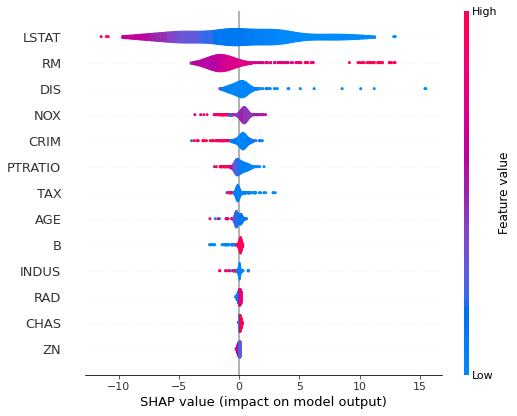

In [10]:
#we can also look at the aggregate summary of all the variables
#Here LSAT seems to the most important variable having the most impact on the outcome
shap.summary_plot(shap_values, X, plot_type="violin")

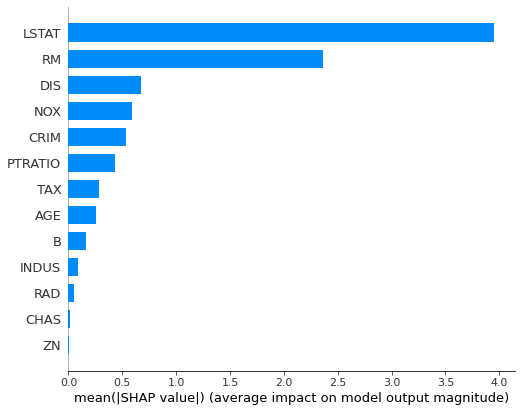

In [11]:
#We can also do a variable importance plot
shap.summary_plot(shap_values, X, plot_type="bar")

**SHAP** is an amazing package to explain complex ML models. It can help a lot in explainability of complex tree models.